In this notebook, I will be answering the following questions: 
1. what relationship does the production budget of a film have to its domestic profit?
2. What is the average budget to profit relationship for all movies? 
3. What is the average budget to profit relationship for the ten highest earners?
4. What is the average budget to profit relationship for the movies with the ten highest budgets?

I will begin by importing a general collection of libraries: 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

To answer question 1, I will explore the realtionship between budget and profit. I will import the dataframs with the necessary information: 

In [3]:
gross = pd.read_csv('/Users/molly/flatiron-ds-course/project1/dsc-mod-1-project-v2-1-online-ds-sp-000/zippedData/bom.movie_gross.csv.gz')
budget = pd.read_csv('/Users/molly/flatiron-ds-course/project1/dsc-mod-1-project-v2-1-online-ds-sp-000/zippedData/tn.movie_budgets.csv.gz')

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


Now that I have imported both dataframes, I will take a superficial look at the data. 

In [4]:
gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


To compare each dataframe, gross shows 3,387 entries, and budget shows 5,782. Gross also has a few missing values (many under foreign_gross it seems), and budget has none. 

In [8]:
gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Because only 28 datapoints are missing under domestic_gross, I will replace the null values with the mean value of that column. 

I will go ahead and delete the foreign_gross column, since I am not interested in its data to answer my questions, and also it has many missing values. 

I will also replace the 5 missing studios with "Unknown Studio"

In [9]:
mean_domestic = gross['domestic_gross'].mean()
gross['domestic_gross'].fillna(mean_domestic, inplace=True)
gross['studio'].fillna("Unknown Studio", inplace=True)
#gross.drop('foreign_gross', axis=1, inplace=True)
#now, to check that we have zero missing values:
gross.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

I will now connect the gross data frame to the budget dataframe and call the new dataframe "gross_and_budget"

In [10]:
to_concat = [gross, budget]
gross_and_budget = pd.concat(to_concat, sort=True)
gross_and_budget.head()

,domestic_gross,foreign_gross,id,movie,production_budget,release_date,studio,title,worldwide_gross,year
0,4.15e+08,652000000,NaN,NaN,NaN,NaN,BV,Toy Story 3,NaN,2010.0
1,3.342e+08,691300000,NaN,NaN,NaN,NaN,BV,Alice in Wonderland (2010),NaN,2010.0
2,2.96e+08,664300000,NaN,NaN,NaN,NaN,WB,Harry Potter and the Deathly Hallows Part 1,NaN,2010.0
3,2.926e+08,535700000,NaN,NaN,NaN,NaN,WB,Inception,NaN,2010.0
4,2.387e+08,513900000,NaN,NaN,NaN,NaN,P/DW,Shrek Forever After,NaN,2010.0


I will now fill the null values of the movie column with the non-null values of the title column, and then I will now drop any duplicate movie titles, and then take a look at the info. 

In [11]:
gross_and_budget.set_index('movie')
gross_and_budget['movie'] = gross_and_budget['movie'].fillna(gross_and_budget['title'])
gross_and_budget.drop_duplicates(subset='movie', inplace=True)
#I can now drop the title column, as it is identical to the movie column.
gross_and_budget.drop('title', axis=1, inplace=True)
gross_and_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7846 entries, 0 to 5781
Data columns (total 9 columns):
domestic_gross       7846 non-null object
foreign_gross        2037 non-null object
id                   4460 non-null float64
movie                7846 non-null object
production_budget    4460 non-null object
release_date         4460 non-null object
studio               3386 non-null object
worldwide_gross      4460 non-null object
year                 3386 non-null float64
dtypes: float64(2), object(7)
memory usage: 613.0+ KB


In [12]:
gross_and_budget.head()

,domestic_gross,foreign_gross,id,movie,production_budget,release_date,studio,worldwide_gross,year
0,4.15e+08,652000000,NaN,Toy Story 3,NaN,NaN,BV,NaN,2010.0
1,3.342e+08,691300000,NaN,Alice in Wonderland (2010),NaN,NaN,BV,NaN,2010.0
2,2.96e+08,664300000,NaN,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,WB,NaN,2010.0
3,2.926e+08,535700000,NaN,Inception,NaN,NaN,WB,NaN,2010.0
4,2.387e+08,513900000,NaN,Shrek Forever After,NaN,NaN,P/DW,NaN,2010.0


To do a little more cleaning up, I'll also drop the ID column, and the worldwide_gross column. 

In [13]:
gross_and_budget.drop('id', axis=1, inplace=True)
gross_and_budget.drop('worldwide_gross', axis=1, inplace=True)

I'll fill the null values of release_date with the non-null values from year, and then drop the year column. 

In [14]:
gross_and_budget['release_date'] = gross_and_budget['release_date'].fillna(gross_and_budget['year'])
gross_and_budget.drop('year', axis=1, inplace=True)

I will delete entries with null values in the production_budget column. Now, I will check to make sure there are no null values.

In [15]:
gross_and_budget = gross_and_budget.dropna(subset=['production_budget'])
gross_and_budget['studio'].fillna("Unknown Studio", inplace=True)
gross_and_budget.isnull().sum()

domestic_gross          0
foreign_gross        4460
movie                   0
production_budget       0
release_date            0
studio                  0
dtype: int64

I will remove all non-numeric characters from production_budget and domestic_gross and then change their series characteristic to a string. 

In [16]:
gross_and_budget['production_budget'] = gross_and_budget['production_budget'].str.replace(',', '')
gross_and_budget['production_budget'] = gross_and_budget['production_budget'].str.replace('$', '')
gross_and_budget['domestic_gross'] = gross_and_budget['domestic_gross'].str.replace(',', '')
gross_and_budget['domestic_gross'] = gross_and_budget['domestic_gross'].str.replace('$', '')
gross_and_budget['production_budget'] = gross_and_budget['production_budget'].astype(float).astype(int)
gross_and_budget['domestic_gross'] = gross_and_budget['domestic_gross'].astype(float).astype(int)


In [17]:
gross_and_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4460 entries, 0 to 5781
Data columns (total 6 columns):
domestic_gross       4460 non-null int64
foreign_gross        0 non-null object
movie                4460 non-null object
production_budget    4460 non-null int64
release_date         4460 non-null object
studio               4460 non-null object
dtypes: int64(2), object(4)
memory usage: 243.9+ KB


In [18]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [19]:
x1 = gross_and_budget["production_budget"]
y1 = gross_and_budget["domestic_gross"]
budget_profit_corr = x1.corr(y1)
print(budget_profit_corr)

0.6700390124831866


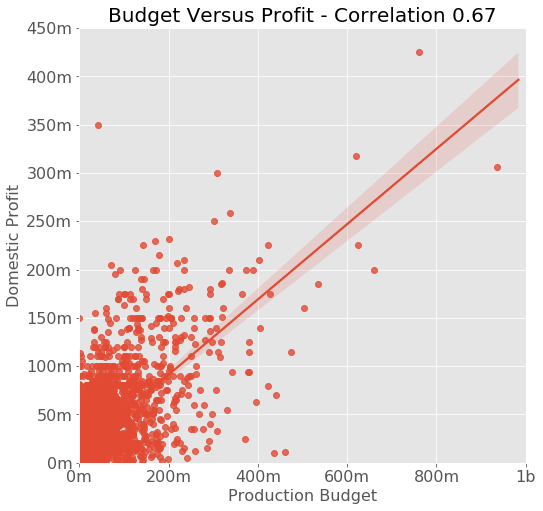

In [20]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(figsize = (8, 8))
    sns.regplot(y='production_budget', x='domestic_gross', data=gross_and_budget)
    plt.ylim(0, 450000000.0)
    b=ax.get_yticks().tolist()
    plt.yticks(b[0:],["0m", "50m", "100m", "150m", "200m", "250m", "300m", "350m", "400m", "450m"], fontsize = 16)
    a=ax.get_xticks().tolist()
    plt.xlim(0, a[-1])
    plt.xticks(a[1:],["0m", "200m", "400m", "600m", "800m", "1b"], fontsize = 16)
    plt.xlabel('Production Budget', fontsize = 16)
    plt.ylabel('Domestic Profit', fontsize = 16)
    plt.title(f'Budget Versus Profit - Correlation {np.round(budget_profit_corr,2)}', fontsize = 20)
    plt.show()

In [21]:
print(b)

[0.0, 50000000.0, 100000000.0, 150000000.0, 200000000.0, 250000000.0, 300000000.0, 350000000.0, 400000000.0, 450000000.0]


I can see that there is a positive correlation between budget and profit (as expected) and so I will check the correlation coefficient, as well as check to see the average profit return pecentage for all listed movies. 

This shows a moderate positive correlation. 

In [22]:
all_dom_mean = gross_and_budget['domestic_gross'].mean()
all_budget_mean = gross_and_budget['production_budget'].mean()
#profit over budget
all_return = (all_dom_mean / all_budget_mean)

In [23]:
print(all_dom_mean,
all_budget_mean, all_return)

36608449.564798206 27557245.331838567 1.3284509799135196


I see here that on average for all movies, every dollar invested into the budget returns about $1.33 in profit. I will now run through the revious few steps again to find if this is the case for the top ten earning movies. 

In [24]:
ten_highest_profit = gross_and_budget.nlargest(10, 'domestic_gross')
ten_highest_profit.sort_index()
ten_highest_profit

,domestic_gross,foreign_gross,movie,production_budget,release_date,studio
5,936662225,NaN,Star Wars Ep. VII: The Force Awakens,306000000,"Dec 18, 2015",Unknown Studio
0,760507625,NaN,Avatar,425000000,"Dec 18, 2009",Unknown Studio
42,659363944,NaN,Titanic,200000000,"Dec 19, 1997",Unknown Studio
26,623279547,NaN,The Avengers,225000000,"May 4, 2012",Unknown Studio
4,620181382,NaN,Star Wars Ep. VIII: The Last Jedi,317000000,"Dec 15, 2017",Unknown Studio
74,533720947,NaN,The Dark Knight,185000000,"Jul 18, 2008",Unknown Studio
134,504014165,NaN,Beauty and the Beast,160000000,"Mar 17, 2017",Unknown Studio
303,474544677,NaN,Star Wars Ep. I: The Phantom Menace,115000000,"May 19, 1999",Unknown Studio
3464,460998007,NaN,Star Wars Ep. IV: A New Hope,11000000,"May 25, 1977",Unknown Studio
692,441226247,NaN,Shrek 2,70000000,"May 19, 2004",Unknown Studio


In [25]:
ten_dom_mean = ten_highest_profit['domestic_gross'].mean()
ten_budget_mean = ten_highest_profit['production_budget'].mean()
top_ten_return = ten_dom_mean / ten_budget_mean
print(ten_dom_mean, ten_budget_mean, top_ten_return)

601449876.6 201400000.0 2.986344968222443


For the top ten earners, of course the budgets and profits are much larger, but more imprtantly, the top earners were able to increase their profit per dollar by over double the average of all of the movies. 

In [26]:
x3 = ten_highest_profit["production_budget"]
y3 = ten_highest_profit["domestic_gross"]
highest_profit_corr = x3.corr(y3)
print(highest_profit_corr)

0.7921592202728227


In [27]:
# to take a look at the top ten domestic profit averages versus the profit averages for all:
ten_dom_mean / all_dom_mean 

16.42926383799492

In [28]:
# to take a look at the top ten budget averages versus the budget averages for all:
ten_budget_mean / all_budget_mean

7.30842279679204

To move on to my final question, I will now be investigating the relationship between budget and profit in the movies that had the highest budgets. 

In [29]:
ten_highest_budget = gross_and_budget.nlargest(10, 'production_budget')
ten_highest_budget.sort_index()
ten_highest_budget

,domestic_gross,foreign_gross,movie,production_budget,release_date,studio
0,760507625,NaN,Avatar,425000000,"Dec 18, 2009",Unknown Studio
2,42762350,NaN,Dark Phoenix,350000000,"Jun 7, 2019",Unknown Studio
4,620181382,NaN,Star Wars Ep. VIII: The Last Jedi,317000000,"Dec 15, 2017",Unknown Studio
5,936662225,NaN,Star Wars Ep. VII: The Force Awakens,306000000,"Dec 18, 2015",Unknown Studio
7,309420425,NaN,Pirates of the Caribbean: At Worldâs End,300000000,"May 24, 2007",Unknown Studio
15,336530303,NaN,Spider-Man 3,258000000,"May 4, 2007",Unknown Studio
19,302089278,NaN,Harry Potter and the Half-Blood Prince,250000000,"Jul 15, 2009",Unknown Studio
23,200120000,NaN,Superman Returns,232000000,"Jun 28, 2006",Unknown Studio
25,169368427,NaN,Quantum of Solace,230000000,"Nov 14, 2008",Unknown Studio
26,623279547,NaN,The Avengers,225000000,"May 4, 2012",Unknown Studio


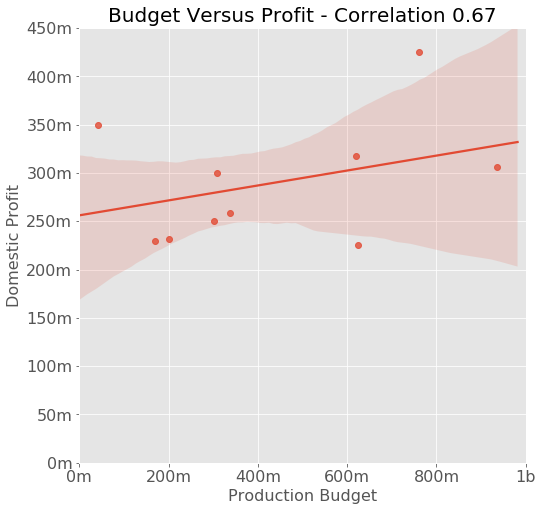

In [30]:
#this is the old code from the original regplot: 
#fig, ax = plt.subplots(figsize = (20, 8))
#sns.regplot(x='production_budget', y='domestic_gross', data=ten_highest_budget)
#plt.xticks(fontsize = 16)
#plt.yticks(fontsize = 16)
#plt.ylabel('Production Budget', fontsize = 16)
#plt.xlabel('Domestic Profit', fontsize = 16)
#plt.title('Budget Versus Profit', fontsize = 20)
#plt.show()

with plt.style.context("ggplot"):
    fig, ax = plt.subplots(figsize = (8, 8))
    sns.regplot(y='production_budget', x='domestic_gross', data=ten_highest_budget)
    plt.ylim(0, 450000000.0)
    d=ax.get_yticks().tolist()
    plt.yticks(b[0:],["0m", "50m", "100m", "150m", "200m", "250m", "300m", "350m", "400m", "450m"], fontsize = 16)
    c=ax.get_xticks().tolist()
    plt.xlim(0, a[-1])
    plt.xticks(a[1:],["0m", "200m", "400m", "600m", "800m", "1b"], fontsize = 16)
    plt.xlabel('Production Budget', fontsize = 16)
    plt.ylabel('Domestic Profit', fontsize = 16)
    plt.title(f'Budget Versus Profit - Correlation {np.round(budget_profit_corr,2)}', fontsize = 20)
    plt.show()

In [31]:
x4 = ten_highest_budget["production_budget"]
y4 = ten_highest_budget["domestic_gross"]
highest_budget_corr = x4.corr(y4)
print(highest_budget_corr)

0.34916067018250274


In [36]:
ten_dom_mean2 = ten_highest_budget['domestic_gross'].mean()
ten_budget_mean2 = ten_highest_budget['production_budget'].mean()
top_ten_return2 = ten_dom_mean2 / ten_budget_mean2
print(ten_dom_mean2, ten_budget_mean2, top_ten_return2)

430092156.2 289300000.0 1.4866649021776701


In [41]:
gross_and_budget.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4460 entries, 0 to 5781
Data columns (total 6 columns):
domestic_gross       4460 non-null int64
foreign_gross        0 non-null object
movie                4460 non-null object
production_budget    4460 non-null int64
release_date         4460 non-null object
studio               4460 non-null object
dtypes: int64(2), object(4)
memory usage: 403.9+ KB


In [155]:
over = gross_and_budget.loc[gross_and_budget['production_budget'] >= 200000000]
print(over['domestic_gross'].mean(), over['production_budget'].mean())

327517789.0 238076923.07692307


In [144]:
over_pb = over["production_budget"]
over_dg = over["domestic_gross"]
over_corr = over_pb.corr(over_dg)
print(over_corr)

0.4439618699889399


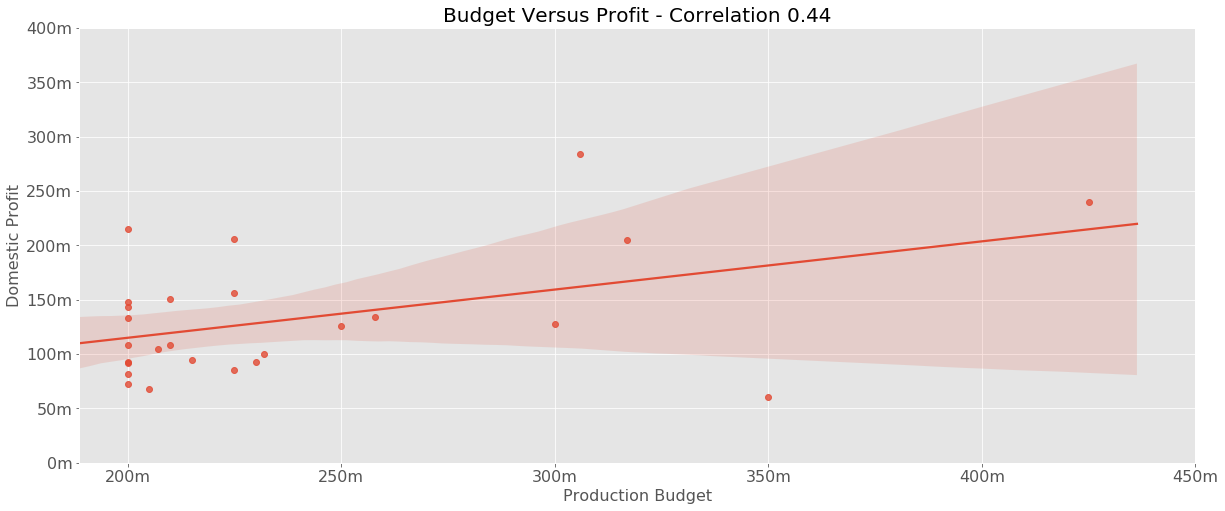

In [147]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(figsize = (20, 8))
    sns.regplot(y='domestic_gross', x='production_budget', data=over)
    plt.ylim()
    d=ax.get_yticks().tolist()
    plt.yticks(d[0:],["0m", "50m", "100m", "150m", "200m", "250m", "300m", "350m", "400m", "450m"], fontsize = 16)
    c=ax.get_xticks().tolist()
    plt.xlim()
    plt.xticks(c[1:],["200m", "250m", "300m", "350m", "400m", "450m"], fontsize = 16)
    plt.xlabel('Production Budget', fontsize = 16)
    plt.ylabel('Domestic Profit', fontsize = 16)
    plt.title(f'Budget Versus Profit - Correlation {np.round(over_corr,2)}', fontsize = 20)
    plt.show()

In [146]:
c

[150000000.0,
 200000000.0,
 250000000.0,
 300000000.0,
 350000000.0,
 400000000.0,
 450000000.0]

In [133]:
under = gross_and_budget.loc[gross_and_budget['production_budget'] <= 200000000]
under['domestic_gross'].mean()

under_pb = under["production_budget"]
under_dg = under["domestic_gross"]
under_corr = under_pb.corr(under_dg)
print(under_corr)

0.6370470158310362


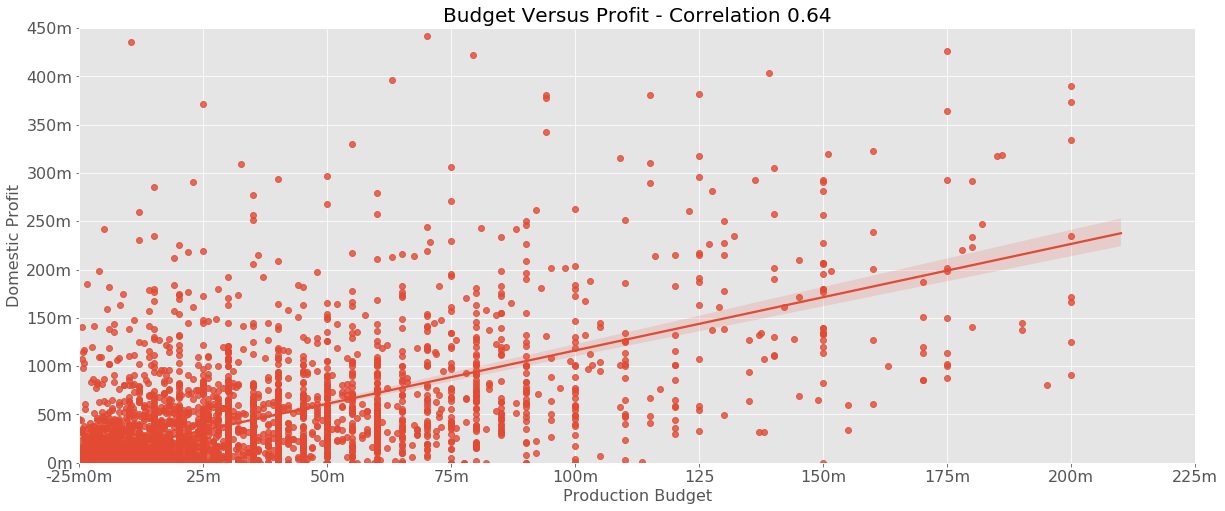

In [134]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(figsize = (20, 8))
    sns.regplot(y='domestic_gross', x='production_budget', data=under)
    plt.ylim(0, 450000000.0)
    g=ax.get_yticks().tolist()
    plt.yticks(g[0:],["0m", "50m", "100m", "150m", "200m", "250m", "300m", "350m", "400m", "450m"], fontsize = 16)
    h=ax.get_xticks().tolist()
    plt.xlim(0, h[-1])
    plt.xticks(h[1:],["-25m" "0m", "25m", "50m", "75m", "100m", "125", "150m", "175m", "200m", "225m",], fontsize = 16)
    plt.xlabel('Production Budget', fontsize = 16)
    plt.ylabel('Domestic Profit', fontsize = 16)
    plt.title(f'Budget Versus Profit - Correlation {np.round(under_corr,2)}', fontsize = 20)
    plt.show()

In [154]:
print(under['production_budget'].mean(),
under['domestic_gross'].mean())

26674614.940355614 35404938.83772226


In [65]:
over_narrow = gross_and_budget.loc[gross_and_budget['production_budget'] >= 250000000]
over_narrow['domestic_gross'].mean()

472593369.71428573

In [68]:
over_narrow_pb = over_narrow["production_budget"]
over_narrow_dg = over_narrow["domestic_gross"]
over_narrow_corr = over_narrow_pb.corr(over_narrow_dg)
print(over_narrow_corr)

0.307823920288535


In [70]:
under_narrow = gross_and_budget.loc[gross_and_budget['production_budget'] >= 100000000]
under_narrow['domestic_gross'].mean()

172137961.70183486

In [71]:
under_narrow_pb = under_narrow["production_budget"]
under_narrow_dg = under_narrow["domestic_gross"]
under_narrow_corr = under_narrow_pb.corr(under_narrow_dg)
print(under_narrow_corr)

0.5519751424455133


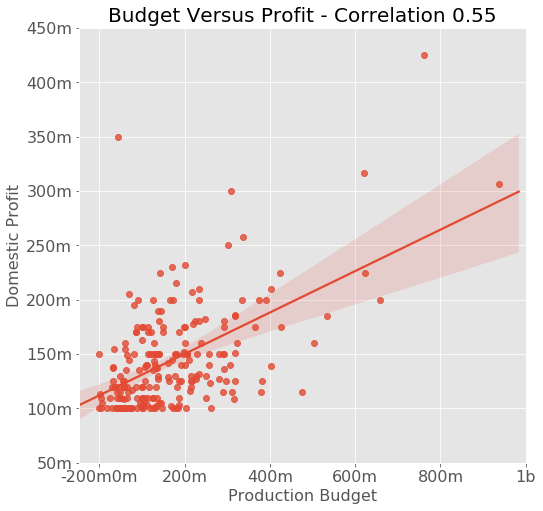

In [84]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(figsize = (8, 8))
    sns.regplot(y='production_budget', x='domestic_gross', data=under_narrow)
    plt.ylim()
    o=ax.get_yticks().tolist()
    plt.yticks(o[0:],[ "50m", "100m", "150m", "200m", "250m", "300m", "350m", "400m", "450m", "500m"], fontsize = 16)
    p=ax.get_xticks().tolist()
    plt.xlim()
    plt.xticks(p[1:],["-200m" "0m", "200m", "400m", "600m", "800m", "1b"], fontsize = 16)
    plt.xlabel('Production Budget', fontsize = 16)
    plt.ylabel('Domestic Profit', fontsize = 16)
    plt.title(f'Budget Versus Profit - Correlation {np.round(under_narrow_corr,2)}', fontsize = 20)
    plt.show()

In [85]:
p

[-200000000.0,
 0.0,
 200000000.0,
 400000000.0,
 600000000.0,
 800000000.0,
 1000000000.0]